In [1]:
from datetime import datetime

from pyspark.sql import SparkSession, DataFrame
from pyspark.sql.types import StringType
from pyspark.sql.functions import udf, col, split, when, to_date, max, min

In [2]:
# Create a SparkSession
spark = SparkSession.builder \
    .master("local[*]") \
    .appName("Midares test job") \
    .getOrCreate()

24/05/14 13:22:56 WARN Utils: Your hostname, pengfei-Virtual-Machine resolves to a loopback address: 127.0.1.1; using 10.50.2.80 instead (on interface eth0)
24/05/14 13:22:56 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


24/05/14 13:22:58 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [3]:
pjc_path= "/home/pengfei/git/PySparkCommonFunc/data/midares/PJC.csv"
pjc_df_1 = spark.read.csv(pjc_path,header=True, inferSchema=True)

In [4]:
pjc_df_1.printSchema()

root
 |-- id_midas: string (nullable = true)
 |-- KROD3: string (nullable = true)
 |-- KDDPJ: timestamp (nullable = true)
 |-- KDFPJ: timestamp (nullable = true)
 |-- KCPJC: integer (nullable = true)
 |-- KCOPP: integer (nullable = true)
 |-- KCFPP: integer (nullable = true)
 |-- KCMNI: string (nullable = true)
 |-- KCALF: double (nullable = true)
 |-- KQRSPP: integer (nullable = true)
 |-- KNOPRP: integer (nullable = true)
 |-- KTDGAP: double (nullable = true)
 |-- KQBPJP: integer (nullable = true)
 |-- KQJSTP: integer (nullable = true)
 |-- KCPJCC: string (nullable = true)
 |-- alloc: string (nullable = true)


In [5]:
print(pjc_df_1.show())

+--------+-----+-------------------+-------------------+-----+-----+-----+-----+-----+------+------+------+------+------+------+-----+
|id_midas|KROD3|              KDDPJ|              KDFPJ|KCPJC|KCOPP|KCFPP|KCMNI|KCALF|KQRSPP|KNOPRP|KTDGAP|KQBPJP|KQJSTP|KCPJCC|alloc|
+--------+-----+-------------------+-------------------+-----+-----+-----+-----+-----+------+------+------+------+------+------+-----+
|     M01|  S01|2017-07-01 00:00:00|2017-09-30 00:00:00|   66|   66|   66|   BK| 26.4|     0|     0|  21.6|     0|    99|    AC| null|
|     M01|  S02|2017-07-04 00:00:00|2017-09-30 00:00:00|   66|   66|   66|   BK| 26.4|     0|     0|  21.6|     0|    99|    AC| null|
|     M01|  S03|2017-07-05 00:00:00|2017-09-30 00:00:00|   66|   66|   66|   BK| 26.4|     0|     0|  21.6|     0|    99|    AC| null|
|     M01|  S04|2017-07-06 00:00:00|2017-09-30 00:00:00|   66|   66|   66|   BK| 26.4|     0|     0|  21.6|     0|    99|    AC| null|
|     M02|  S01|2017-08-05 00:00:00|2017-09-30 00:00:00

In [8]:
pjc_df_1 = pjc_df_1.withColumn("KDDPJ_date",to_date(col("KDDPJ"))).withColumn("KDFPJ_date",to_date(col("KDFPJ"))).drop("KDDPJ","KDFPJ").withColumnRenamed("KDDPJ_date","KDDPJ").withColumnRenamed("KDFPJ_date","KDFPJ")

In [9]:
pjc_df_1.printSchema()

root
 |-- id_midas: string (nullable = true)
 |-- KROD3: string (nullable = true)
 |-- KCPJC: integer (nullable = true)
 |-- KCOPP: integer (nullable = true)
 |-- KCFPP: integer (nullable = true)
 |-- KCMNI: string (nullable = true)
 |-- KCALF: double (nullable = true)
 |-- KQRSPP: integer (nullable = true)
 |-- KNOPRP: integer (nullable = true)
 |-- KTDGAP: double (nullable = true)
 |-- KQBPJP: integer (nullable = true)
 |-- KQJSTP: integer (nullable = true)
 |-- KCPJCC: string (nullable = true)
 |-- alloc: string (nullable = true)
 |-- KDDPJ: date (nullable = true)
 |-- KDFPJ: date (nullable = true)


In [10]:
pjc_df_1.show()

+--------+-----+-----+-----+-----+-----+-----+------+------+------+------+------+------+-----+----------+----------+
|id_midas|KROD3|KCPJC|KCOPP|KCFPP|KCMNI|KCALF|KQRSPP|KNOPRP|KTDGAP|KQBPJP|KQJSTP|KCPJCC|alloc|     KDDPJ|     KDFPJ|
+--------+-----+-----+-----+-----+-----+-----+------+------+------+------+------+------+-----+----------+----------+
|     M01|  S01|   66|   66|   66|   BK| 26.4|     0|     0|  21.6|     0|    99|    AC| null|2017-07-01|2017-09-30|
|     M01|  S02|   66|   66|   66|   BK| 26.4|     0|     0|  21.6|     0|    99|    AC| null|2017-07-04|2017-09-30|
|     M01|  S03|   66|   66|   66|   BK| 26.4|     0|     0|  21.6|     0|    99|    AC| null|2017-07-05|2017-09-30|
|     M01|  S04|   66|   66|   66|   BK| 26.4|     0|     0|  21.6|     0|    99|    AC| null|2017-07-06|2017-09-30|
|     M02|  S01|   66|   66|   66|   BK| 26.4|     0|     0|  21.6|     0|    99|    AC| null|2017-08-05|2017-09-30|
|     M02|  S02|   66|   66|   66|   BK| 26.4|     0|     0|  21

In [34]:
dateformat_str = "%Y-%m-%d"
feature_cols = ["id_midas", "KROD3"]

seuil_debut = datetime.strptime("2017-01-01", dateformat_str)
seuil_fin = datetime.strptime("2023-08-31", dateformat_str)
seuil_raz = datetime.strptime("2021-07-01", dateformat_str)
seuil_fin_censure_17 = datetime.strptime("2018-08-31", dateformat_str)
seuil_fin_censure_18 = datetime.strptime("2019-08-31", dateformat_str)
seuil_fin_censure_19 = datetime.strptime("2020-08-31", dateformat_str)

In [40]:
pjc_df_2 = pjc_df_1.select("id_midas", "KROD3", "KCPJC", "KQBPJP", "KDDPJ", "KDFPJ", "KCFPP", "alloc")

In [35]:
temp = pjc_df_2 \
    .filter(col("KDDPJ") <= seuil_fin) \
    .groupBy(feature_cols).agg(max("KDFPJ").alias("date_der_PJC"), min("KDDPJ").alias("date_ouv_droit")).orderBy("id_midas","KROD3")

In [36]:
temp.show()

+--------+-----+------------+--------------+
|id_midas|KROD3|date_der_PJC|date_ouv_droit|
+--------+-----+------------+--------------+
|     M01|  S01|  2017-09-30|    2017-07-01|
|     M01|  S02|  2017-09-30|    2017-07-04|
|     M01|  S03|  2017-09-30|    2017-07-05|
|     M01|  S04|  2017-09-30|    2017-07-06|
|     M02|  S01|  2017-09-30|    2017-08-05|
|     M02|  S02|  2017-09-30|    2017-08-03|
|     M02|  S03|  2017-09-30|    2017-08-02|
|     M02|  S04|  2017-09-30|    2017-08-01|
+--------+-----+------------+--------------+


In [39]:
resu = pjc_df_2.join(temp, feature_cols, type="inner")
resu.show(5)

In [31]:
# build time elapse graph

script_name="test"
job_id = "1"
job_name= f"{script_name}_{job_id}"

In [3]:
from pyspark.sql.types import StructType, StructField, LongType

schema = StructType([       
    StructField('job_name', StringType(), True),
    StructField('cluster_config', StringType(), True),
    StructField('operation', StringType(), True),
    StructField('duration(seconds)', LongType(), True)
])

sample_data= [("test_1","driver:4core_16g worker:16core_128g","spark_session_creation",190),
              ("test_1","driver:4core_16g worker:16core_128g","job_execution_time",288),
              ("test_2","driver:6core_16g worker:16core_128g","spark_session_creation",160),
              ("test_2","driver:6core_16g worker:16core_128g","job_execution_time",240),
              ("test_3","driver:4core_16g worker:32core_256g","spark_session_creation",190),
              ("test_3","driver:4core_16g worker:32core_256g","job_execution_time", 100)
              ]

df = spark.createDataFrame(data=sample_data,schema=schema)

df.show()

+--------+--------------------+--------------------+-----------------+
|job_name|      cluster_config|           operation|duration(seconds)|
+--------+--------------------+--------------------+-----------------+
|  test_1|driver:4core_16g ...|spark_session_cre...|              190|
|  test_1|driver:4core_16g ...|  job_execution_time|              288|
|  test_2|driver:6core_16g ...|spark_session_cre...|              160|
|  test_2|driver:6core_16g ...|  job_execution_time|              240|
|  test_3|driver:4core_16g ...|spark_session_cre...|              190|
|  test_3|driver:4core_16g ...|  job_execution_time|              100|
+--------+--------------------+--------------------+-----------------+


/tmp/ipykernel_2406762/2718944201.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  g_col_op = sns.catplot(
/home/pengfei/.cache/pypoetry/virtualenvs/sparkcommonfunc-jby-k8HJ-py3.8/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


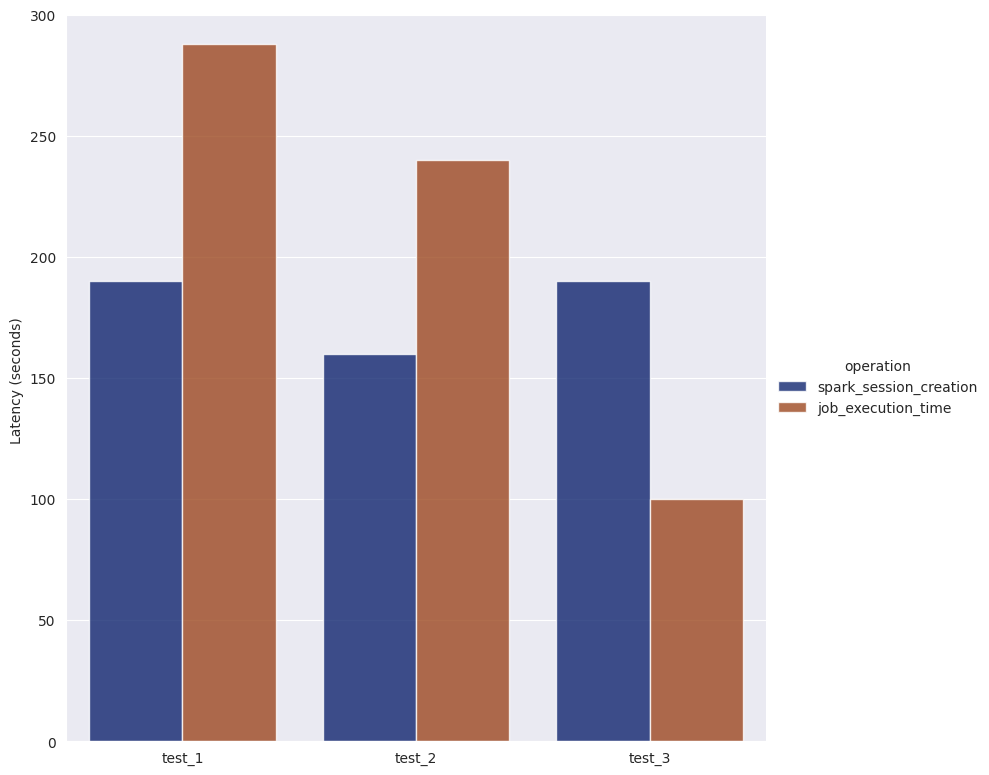

In [4]:
import seaborn as sns

g_col_op = sns.catplot(
    data=df.toPandas(), kind="bar",hue="operation",
    x="job_name", y="duration(seconds)", 
    order=['test_1','test_2','test_3'],
    ci="sd", palette="dark", alpha=0.8, height=8
)
g_col_op.despine(left=False)
g_col_op.set_axis_labels("", "Latency (seconds) ")
g_col_op.set(ylim=(0, 300))

In [7]:
output_path = "/home/pengfei/git/PySparkCommonFunc/data/midares/time"
df.coalesce(1).write.mode("overwrite").options(header=True,delimiter=",").csv(output_path)

In [9]:
import time

# Get current time in seconds since the epoch
start_time = int(time.time())



In [10]:
end_time = int(time.time())

In [11]:
print(f"Duration in seconds: {end_time-start_time}")

Duration in seconds: 1


In [8]:
import pandas as pd

csv_path = "/home/pengfei/git/PySparkCommonFunc/data/midares/time.csv"
pdf = pd.read_csv(csv_path, header=0, sep=',')

In [9]:
pdf.head(5)

,job_name,cluster_config,operation,duration(seconds)
0,test_1,driver:4core_16g worker:16core_128g,spark_session_creation,190
1,test_1,driver:4core_16g worker:16core_128g,job_execution_time,288
2,test_2,driver:6core_16g worker:16core_128g,spark_session_creation,160
3,test_2,driver:6core_16g worker:16core_128g,job_execution_time,240
4,test_3,driver:4core_16g worker:32core_256g,spark_session_creation,190
